<a href="https://colab.research.google.com/github/samibahig/AutomaticSeedDetection/blob/main/Cardiovascular_Framingham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#pd.set_option("max_columns", None)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
# Acquisition des données et Affichage
df = pd.read_csv("/content/framingham.csv")
print('VOICI LE CONTENU DU DATAFRAME df')
df

VOICI LE CONTENU DU DATAFRAME df


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,0,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,0,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,1,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,1,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1,50,0,1,1,0,0,1,0,313,179.0,92.0,25.97,66,86,1
4129,1,51,1,1,43,0,0,0,0,207,126.5,80.0,19.71,65,68,0
4130,0,48,0,1,20,0,0,0,0,248,131.0,72.0,22.00,84,86,0
4131,0,44,0,1,15,0,0,0,0,210,126.5,87.0,19.16,86,82,0


In [ ]:
### The data consists of 4133 patient records presenting 
### with cardiovascular disease) and contains 16 features (4 demographic, 
### 4 examination, and 3 social history):

In [ ]:
### Voici les différents datatypes de variable

In [ ]:
print(df.dtypes)

male                 int64
age                  int64
education            int64
currentSmoker        int64
cigsPerDay           int64
BPMeds               int64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol              int64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
glucose              int64
TenYearCHD           int64
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   int64  
 5   BPMeds           4133 non-null   int64  
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   int64  
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   int64  
 14  glucose          4133 non-null   int64  
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 516.8 KB


In [ ]:
### Verification des données de la classe cible
# Dimension du dataset
print('La dimension du dataset est :', df.shape)
print('Le nombre de lignes du dataset est : ', df.shape[0])
print('le nombre de colonnes du dataset est: ', df.shape[1])
print('La repartition de la classe cible est :')
df['TenYearCHD'].value_counts()

La dimension du dataset est : (4133, 16)
Le nombre de lignes du dataset est :  4133
le nombre de colonnes du dataset est:  16
La repartition de la classe cible est :


0    3505
1     628
Name: TenYearCHD, dtype: int64

In [ ]:
# Vérification des données manquantes
print('Liste des colonnes ayant des valeurs nulles')
print(df.isnull().sum())

Liste des colonnes ayant des valeurs nulles
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [ ]:
### Il n'y a pas de données manquantes

In [ ]:
### Verification des données inconnues:

In [ ]:
df_verif = df.replace('?', np.NaN)
print('Nombre de lignes = %d' % (df_verif.shape[0]))
print('Nombre de colonnes = %d' % (df_verif.shape[1]))
print('Nombre de donnees manquantes par caracteristiques:')
for col in df_verif.columns:
    print('\t%s: %d' % (col, df_verif[col].isna().sum()))

Nombre de lignes = 4133
Nombre de colonnes = 16
Nombre de donnees manquantes par caracteristiques:
	male: 0
	age: 0
	education: 0
	currentSmoker: 0
	cigsPerDay: 0
	BPMeds: 0
	prevalentStroke: 0
	prevalentHyp: 0
	diabetes: 0
	totChol: 0
	sysBP: 0
	diaBP: 0
	BMI: 0
	heartRate: 0
	glucose: 0
	TenYearCHD: 0


In [ ]:
### Il n'y a pas de données inconnues
### Vérification des données aberrantes
### Sachant que toutes les variables sont quantitatives, il sera possible de faire une PCA

In [ ]:
N = df.shape[0]
K = df.shape[1]

In [ ]:
N, K

(4133, 16)

In [ ]:
### Commençons par une matrice de corrélation, pour voir les corrélations entre les variables

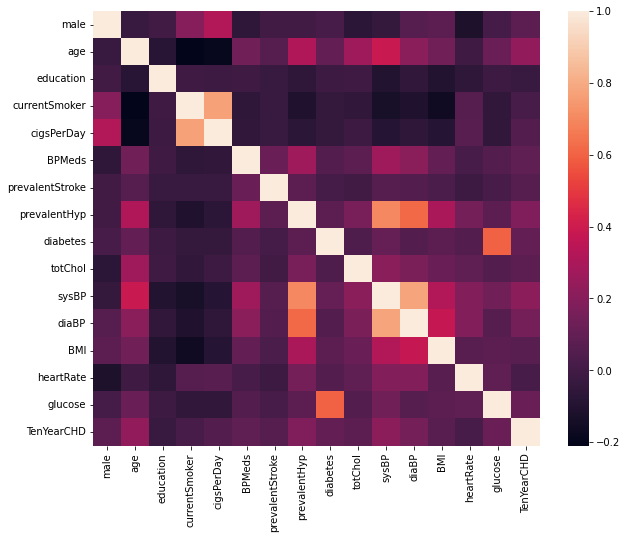

In [ ]:
corr=df.corr()
corr=corr.round(2)
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr)
plt.show()

In [ ]:
### Beside the heart rate and education, most of the variables have a good correlation with the TenYearCHD

In [ ]:
### Let's check if there is any outliers before choosing the standardidation method

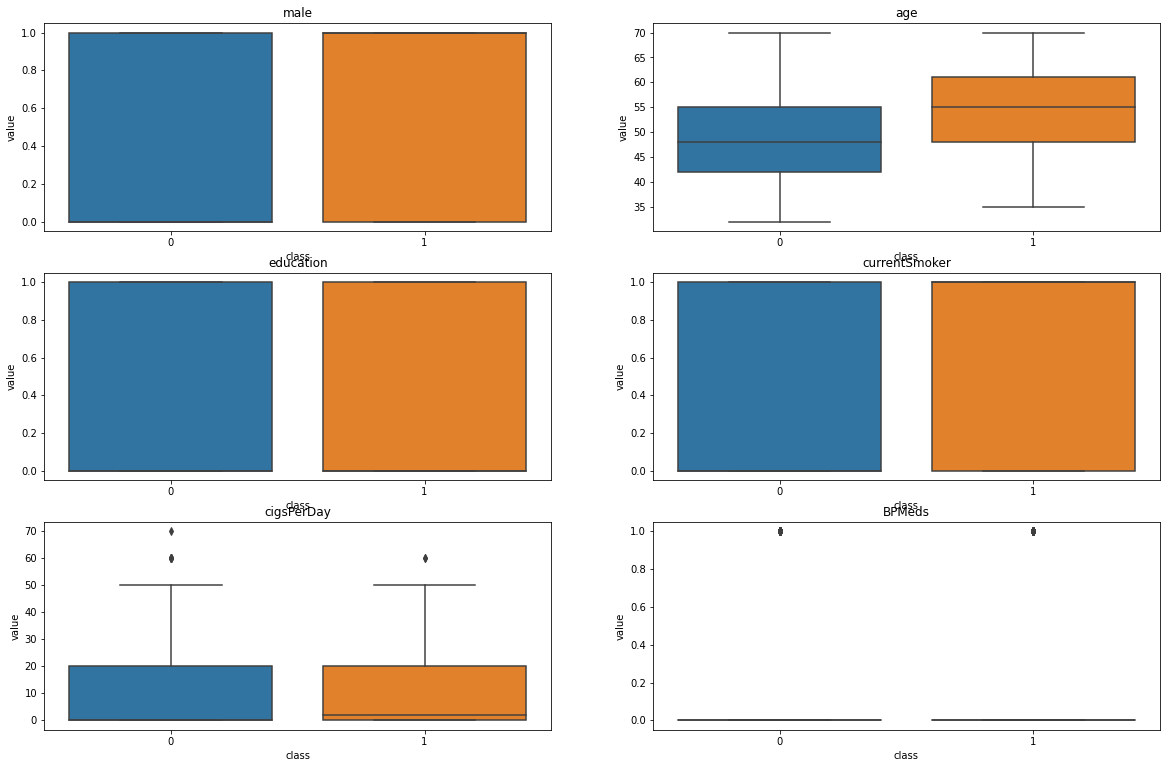

In [ ]:
# affichage du boxplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 13))
feature_index = 0
for ii in range(3):
    for jj in range(2): 
        ax = sns.boxplot(x=df['TenYearCHD'], y=df.columns.values[feature_index], data=df, ax=axes[ii, jj])
        ax.set(title=df.columns.values[feature_index], xlabel='class', ylabel='value')
        feature_index += 1
plt.show()  

In [ ]:
### So we have outliers in the class variable

In [ ]:
### Sachant que toutes les variables sont quantitatives, il sera possible de faire une PCA

In [ ]:
N = df.shape[0]
K = df.shape[1]

In [ ]:
N, K

(4133, 16)

In [ ]:
### Analyse en composante principale

In [ ]:
import math
Moy = np.mean(df.round(3), axis=0)

In [ ]:
print('Les moyennes des variables de X \n', Moy.round(3))
print('Les ecarts types des variables de X\n', np.std(df, axis=0, ddof=0))

Les moyennes des variables de X 
 male                 0.427
age                 49.557
education            0.281
currentSmoker        0.495
cigsPerDay           9.102
BPMeds               0.034
prevalentStroke      0.006
prevalentHyp         0.311
diabetes             0.026
totChol            236.664
sysBP              132.367
diaBP               82.872
BMI                 25.779
heartRate           75.925
glucose             81.947
TenYearCHD           0.152
dtype: float64
Les ecarts types des variables de X
 male                0.494685
age                 8.560593
education           0.449325
currentSmoker       0.499973
cigsPerDay         11.916998
BPMeds              0.182146
prevalentStroke     0.077539
prevalentHyp        0.462966
diabetes            0.158081
totChol            43.903876
sysBP              22.077661
diaBP              11.951208
BMI                 4.073867
heartRate          12.047730
glucose            22.858188
TenYearCHD          0.358970
dtype: float64


In [ ]:
### Voici la matrice des données quantitatives df standardisées et réduites

In [ ]:
### Voici la matrice de données quantitatives avant réduction

In [ ]:
DC = df.iloc[:, 2::]
p1 = DC.shape[1]
print(DC)

      education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0             1              0           0       0                0   
1             0              0           0       0                0   
2             0              1          20       0                0   
3             1              1          30       0                0   
4             1              1          23       0                0   
...         ...            ...         ...     ...              ...   
4128          0              1           1       0                0   
4129          1              1          43       0                0   
4130          0              1          20       0                0   
4131          0              1          15       0                0   
4132          0              0           0       0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0      195  106.0   70.0  26.97         80   
1

In [ ]:
### voici la matrice de donnees standardisees et réduites

In [ ]:
df2 = (DC.values-np.mean(DC.values, axis=0))/np.std(DC.values, axis=0)
print(df2.round(3))

[[ 1.601 -0.99  -0.764 ...  0.338 -0.216 -0.423]
 [-0.625 -0.99  -0.764 ...  1.583 -0.26  -0.423]
 [-0.625  1.01   0.915 ... -0.077 -0.523 -0.423]
 ...
 [-0.625  1.01   0.915 ...  0.67   0.177 -0.423]
 [-0.625  1.01   0.495 ...  0.836  0.002 -0.423]
 [-0.625 -0.99  -0.764 ...  0.338  1.096 -0.423]]


In [ ]:
### Analyse en composante principales

In [ ]:
corr_matrix = np.corrcoef(df2.transpose())

In [ ]:
print("La matrice de corrélation: \n", corr_matrix.round(2))

La matrice de corrélation: 
 [[ 1.   -0.01 -0.02 -0.01 -0.03 -0.06 -0.02 -0.01 -0.1  -0.05 -0.1  -0.06
  -0.02 -0.03]
 [-0.01  1.    0.77 -0.06 -0.03 -0.11 -0.04 -0.05 -0.13 -0.11 -0.16  0.06
  -0.05  0.02]
 [-0.02  0.77  1.   -0.05 -0.03 -0.07 -0.04 -0.02 -0.09 -0.06 -0.09  0.07
  -0.05  0.05]
 [-0.01 -0.06 -0.05  1.    0.12  0.27  0.05  0.08  0.27  0.21  0.1   0.02
   0.05  0.09]
 [-0.03 -0.03 -0.03  0.12  1.    0.08  0.01  0.    0.06  0.05  0.03 -0.02
   0.02  0.06]
 [-0.06 -0.11 -0.07  0.27  0.08  1.    0.08  0.16  0.7   0.62  0.3   0.15
   0.08  0.18]
 [-0.02 -0.04 -0.04  0.05  0.01  0.08  1.    0.04  0.11  0.05  0.08  0.05
   0.6   0.1 ]
 [-0.01 -0.05 -0.02  0.08  0.    0.16  0.04  1.    0.21  0.17  0.12  0.09
   0.05  0.08]
 [-0.1  -0.13 -0.09  0.27  0.06  0.7   0.11  0.21  1.    0.78  0.32  0.19
   0.14  0.22]
 [-0.05 -0.11 -0.06  0.21  0.05  0.62  0.05  0.17  0.78  1.    0.38  0.19
   0.06  0.15]
 [-0.1  -0.16 -0.09  0.1   0.03  0.3   0.08  0.12  0.32  0.38  1.    0.07
   0.08

In [ ]:
### Calcul de valeurs propres de l'ensemble de données

In [ ]:
eigval, vectors = np.linalg.eig(corr_matrix)
print('Les valeurs propres sont', '\n', eigval.round(3), '\n')

Les valeurs propres sont 
 [3.05  1.764 1.567 0.19  0.224 0.385 0.396 0.732 1.105 1.016 0.838 0.868
 0.936 0.93 ] 



In [ ]:
Lambda_min = 1/13
print('Lambda_min est égal a', Lambda_min)

Lambda_min est égal a 0.07692307692307693


In [ ]:
### En se basant sur le critère de Kaiser, le nombre de
### composantes principales que nous devons retenir est de 20

In [ ]:
explained_variances = []
for i in range(len(eigval)):
    explained_variances.append(eigval[i]/np.sum(eigval))
print('La variance expliquee', '\n', explained_variances)

La variance expliquee 
 [0.21784910066400467, 0.12600339385812942, 0.11189444122946403, 0.013581735615597825, 0.016013947012169637, 0.02749698899290813, 0.028259407915647416, 0.052282609524888675, 0.07891977445704723, 0.07257455933703097, 0.05982603210418491, 0.06198293805862367, 0.06688210711383148, 0.06643296411647191]


In [ ]:
### Voici l'ACP

In [ ]:
from sklearn.decomposition import PCA
acp = PCA(svd_solver='full', n_components=None)

In [ ]:
C = acp.fit_transform(df2)
print(C.round(3))

[[-1.476 -1.635 -0.005 ... -0.307  0.167  0.018]
 [-0.009 -1.022 -0.217 ...  0.269  0.133 -0.13 ]
 [-1.001  1.178 -0.266 ...  0.399 -0.084  0.134]
 ...
 [-1.254  1.269  0.377 ... -0.05  -0.06   0.564]
 [-1.077  1.133  0.11  ...  0.633 -0.23  -0.386]
 [-0.077 -1.151  0.643 ...  0.186  0.251 -0.002]]


In [ ]:
### voici les individus des deux composantes principales

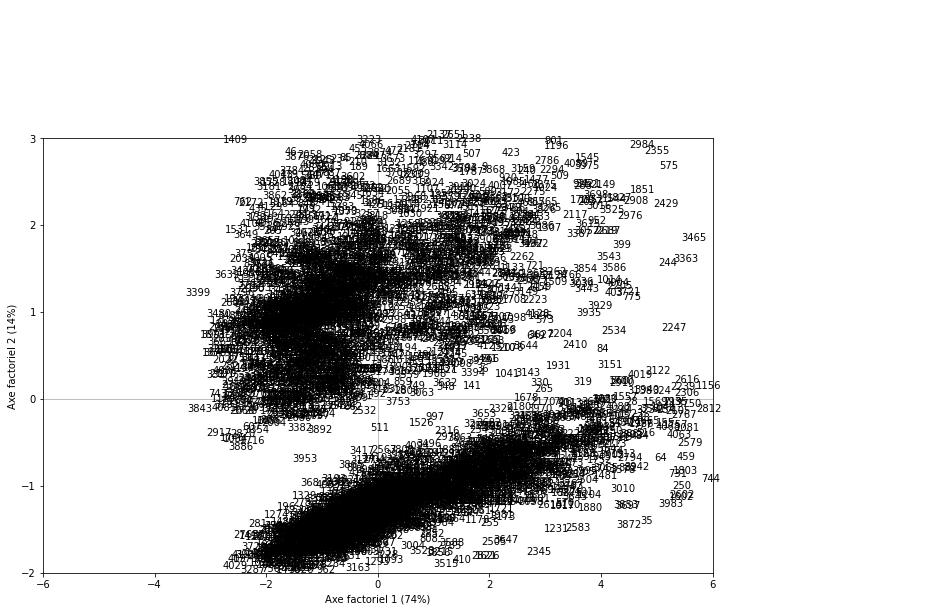

In [ ]:
import matplotlib.pyplot as plt
# positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,8))
axes.set_xlim(-6,6) # meme limites en abcisse
axes.set_ylim(-2,3) # et en ordonnee
for i in range(N):
    plt.annotate(DC.index[i], (C[i,0], C[i, 1]))
plt.plot([-6,6], [0,0], color='silver', linestyle='-', linewidth=1)
plt.plot([0,0], [-2,3], color='silver', linestyle='-', linewidth=1)
plt.ylabel("Axe factoriel 2 (14%)")
plt.xlabel("Axe factoriel 1 (74%)")
plt.show()

In [ ]:
#!/usr/bin/env python
# coding: utf-8
# # Avec PCA et conclusion sur les cluters.
# In[1]:
import pandas as pd
#pd.set_option("max_columns", None)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
#df_processed.head()

In [ ]:
#!/usr/bin/env python
# coding: utf-8
# # Avec PCA et conclusion sur les cluters.
# In[1]:
import pandas as pd
#pd.set_option("max_columns", None)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
#df.head()

In [ ]:
# ## Standardisation
# In[7]:
sc =  RobustScaler()
# In[8]:
df_std = sc.fit_transform(df2)
#pd.set_option("max_rows", None)

In [ ]:
df_std2 = pd.DataFrame(df_std)
df_std2.head()
# ## PCA
# In[9]:
pca = PCA(svd_solver = "full")
# In[10]:
coord_pca = pca.fit_transform(df_std2)

variances expliquÃ©es:
['0.32', '0.15', '0.09', '0.08', '0.07', '0.06', '0.05', '0.05', '0.04', '0.04', '0.02', '0.01', '0.01', '0.01']


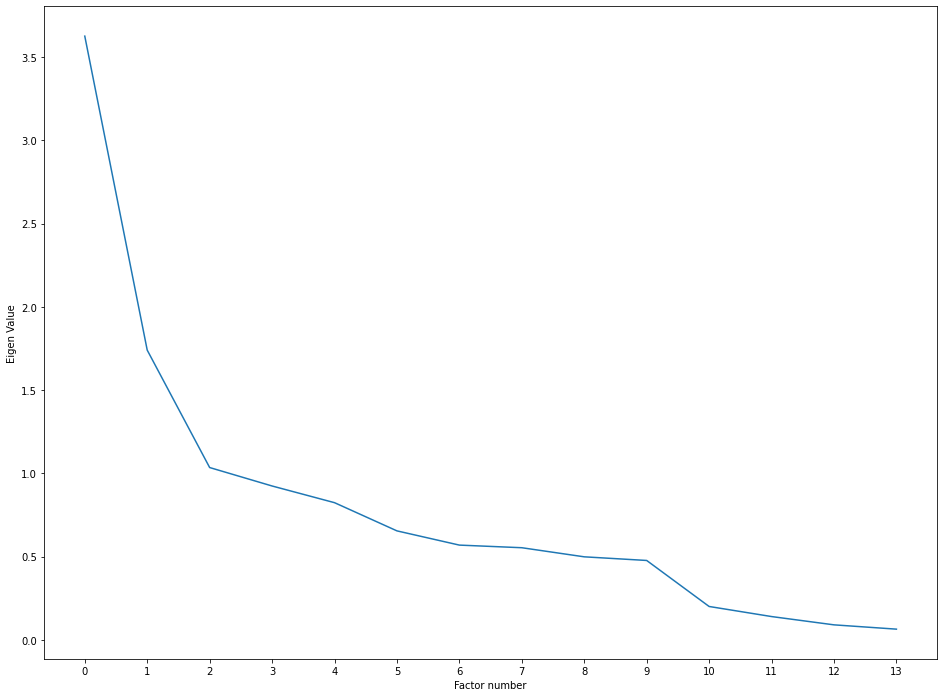

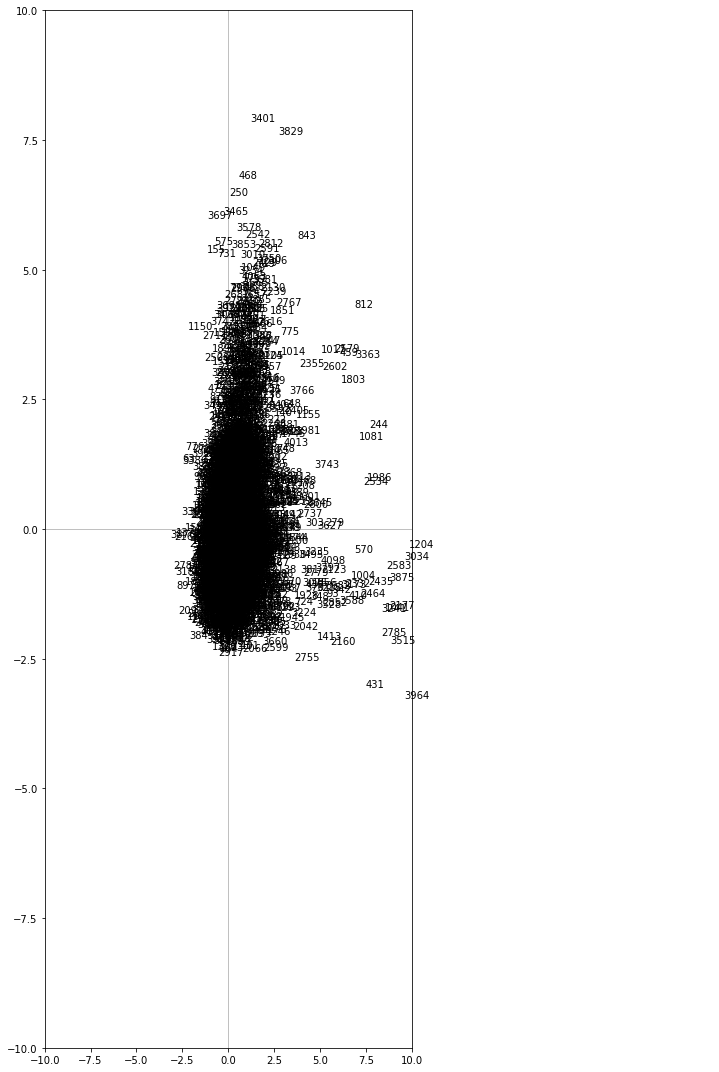

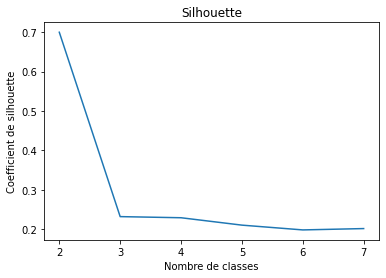

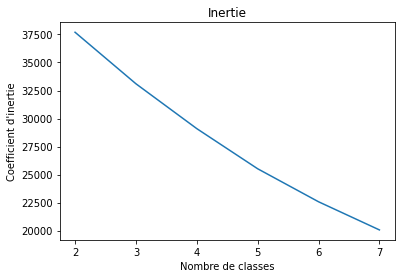

In [ ]:
# In[11]:
print("variances expliquÃ©es:")
print(["%0.2f" % i for i in pca.explained_variance_ratio_])
# In[12]:
# Valeur propre
eigval = pca.explained_variance_
["%0.2f" % i for i in eigval]
# In[13]:
plt.figure(figsize=(16,12))
plt.plot(np.arange(len(eigval)), eigval)
plt.xticks(np.arange(0, len(eigval), step=1))
plt.ylabel("Eigen Value")
plt.xlabel("Factor number")
plt.show()
# On note un coude franc Ã  1 mais je pense qu'un graphique en 2 dimensions sera plus lisible.
# In[14]:
f, ax= plt.subplots(figsize=(15,15))
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
n=df.shape[0]
for i in range(n):
    plt.annotate(df_std2.index[i], (coord_pca[i,0], coord_pca[i,1])) 
    plt.plot([-10,10],[0,0],color = "silver", linestyle = "-", linewidth=1)
    plt.plot([0,0],[-10,10],color = "silver", linestyle = "-", linewidth=1)    
plt.tight_layout() 
plt.show()
## Clustering
# In[15]:
from sklearn.cluster import KMeans
from sklearn import metrics
# In[16]:
res=[] 
wcss=[]
nb_max_cluster=8
range_n_cluster = range(2, nb_max_cluster)
for k in range_n_cluster:   
    km = KMeans(n_clusters=k, n_init=1000) 
    km.fit(coord_pca) 
    res.append(metrics.silhouette_score(coord_pca,km.labels_) )
    wcss.append(km.inertia_)
# In[17]:
#plot nb. clusters vs. silhouette score 
import matplotlib.pyplot as plt 
plt.plot(np.arange(2, nb_max_cluster, 1),res) 
plt.title("Silhouette")
plt.xlabel("Nombre de classes")
plt.ylabel("Coefficient de silhouette")
plt.show() 

#plot nb. clusters vs. Inertie score 
import matplotlib.pyplot as plt 
plt.plot(np.arange(2, nb_max_cluster, 1),wcss) 
plt.title("Inertie")
plt.xlabel("Nombre de classes")
plt.ylabel("Coefficient d'inertie")
plt.show() 

In [ ]:
### le premier axe permet d'expliquer 57% de la variance et 
### le deuxième axe permet d'expliquer 24 % de la variance

In [ ]:
### Clustering using Kmeans

In [ ]:
### Nous choisirons le nombre de cluster 4, c'est le nombre qui a 
### le grand coefficient de silhouette et le plus petit nombre de 
### coefficient d'inertie

In [ ]:
cluster_count = 4
km = KMeans(n_clusters=cluster_count, n_init=10, max_iter=100) 
km.fit(coord_pca) 
km.labels_
cluster_labels = km.fit_predict(coord_pca)
cluster_labels
df_clustered=df_std.copy()
#df_clustered["clusters"]=cluster_labels    ### Madame Nathalie ???
#df_clustered.head()

In [ ]:
#moyenne par variable
m = df.mean()
#TSS
shape = df.shape[0]
variance = df.var(ddof=0)

TSS = df.shape[0]*df.var(ddof=0)
print(shape)
print(variance)
print(TSS)

#data.frame conditionnellement aux groupes
gb = df.groupby(cluster_labels)
#effectifs conditionnels
nk = gb.size()
print("nk")
print(nk)

#moyennes conditionnelles
mk = gb.mean()
print("mk")
print(mk)

#pour chaque groupe écart à la moyenne par variable
EMk = (mk-m)**2
#pondéré par les effectifs du groupe
EM = EMk.multiply(nk,axis=0)
#somme des valeurs => BSS
BSS = np.sum(EM,axis=0)
print("BSS")
display(BSS)
print("")

#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes
#pour chaque variable
R2 = BSS/TSS
display("R2")
print(R2)

4133
male                  0.244714
age                  73.283745
education             0.201893
currentSmoker         0.249973
cigsPerDay          142.014836
BPMeds                0.033177
prevalentStroke       0.006012
prevalentHyp          0.214337
diabetes              0.024989
totChol            1927.550335
sysBP               487.423105
diaBP               142.831369
BMI                  16.596392
heartRate           145.147810
glucose             522.496778
TenYearCHD            0.128860
dtype: float64
male               1.011401e+03
age                3.028817e+05
education          8.344254e+02
currentSmoker      1.033138e+03
cigsPerDay         5.869473e+05
BPMeds             1.371212e+02
prevalentStroke    2.484878e+01
prevalentHyp       8.858558e+02
diabetes           1.032814e+02
totChol            7.966566e+06
sysBP              2.014520e+06
diaBP              5.903220e+05
BMI                6.859289e+04
heartRate          5.998959e+05
glucose            2.159479e+06
TenY

male               4.347265e-01
age                3.081895e+04
education          4.881838e+00
currentSmoker      1.600199e+01
cigsPerDay         4.229973e+03
BPMeds             1.064947e+01
prevalentStroke    2.484878e+01
prevalentHyp       4.926335e+02
diabetes           7.165352e+01
totChol            4.341868e+05
sysBP              1.003785e+06
diaBP              2.590234e+05
BMI                1.049108e+04
heartRate          2.658460e+04
glucose            1.076141e+06
TenYearCHD         6.492343e+01
dtype: float64

'R2'

male               0.000430
age                0.101752
education          0.005851
currentSmoker      0.015489
cigsPerDay         0.007207
BPMeds             0.077665
prevalentStroke    1.000000
prevalentHyp       0.556110
diabetes           0.693770
totChol            0.054501
sysBP              0.498275
diaBP              0.438783
BMI                0.152947
heartRate          0.044315
glucose            0.498333
TenYearCHD         0.121904
dtype: float64


In [ ]:
### According to the R2 score, we have high R2 for glucose, sysBP, diaBP, diabetes, prevalent Hyp

In [ ]:
### Clustering en utilisant la méthode CAH

In [ ]:
# libraries pour la CAH
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

In [ ]:
# générer la matrice des liens
Z = linkage(coord_pca[0:1000], method='ward', metric='euclidean')
c, coph_dists = cophenet(Z, pdist(coord_pca[0:1000]))
c

0.5882492445969828

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


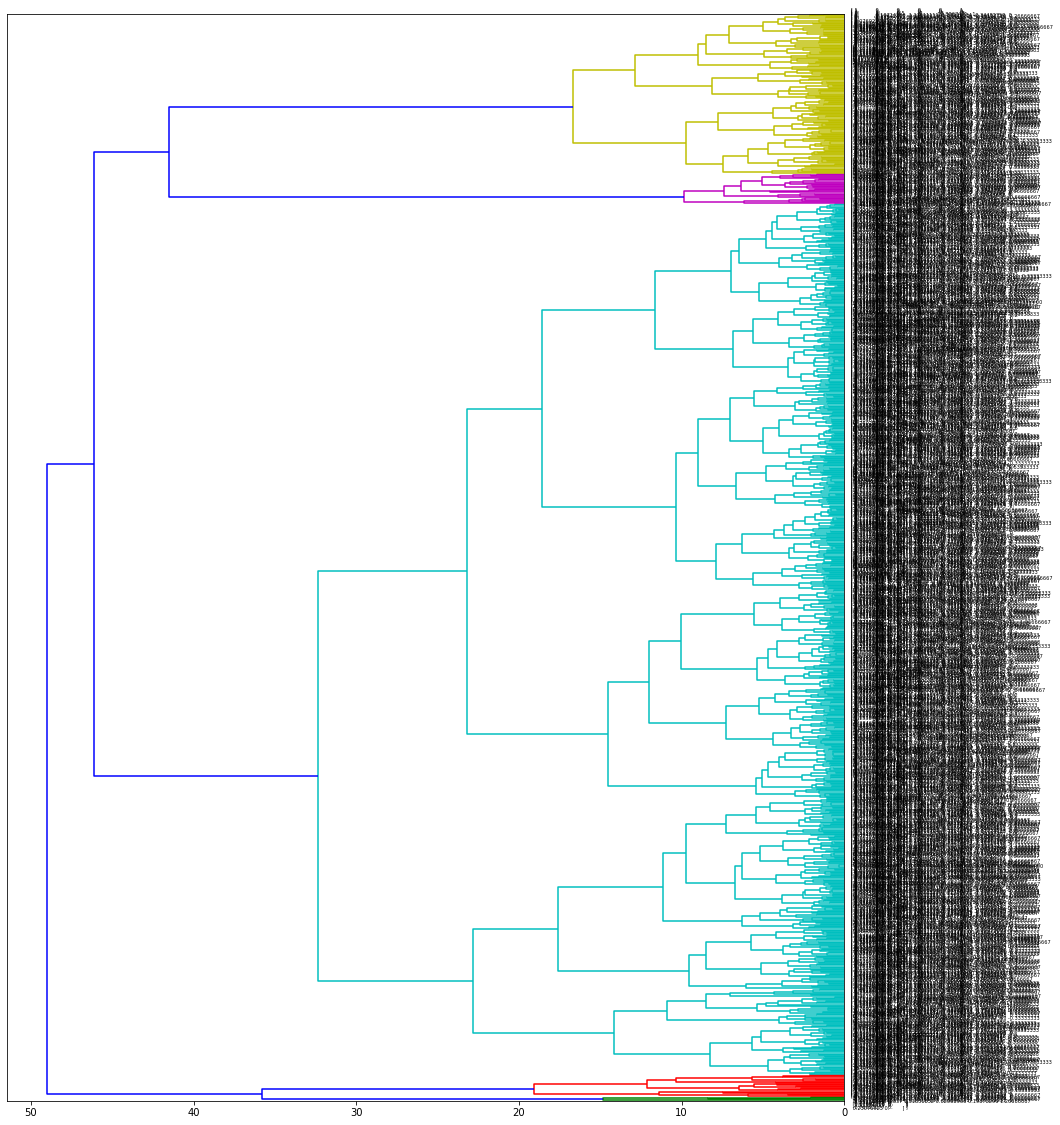

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
res = []
wcss = []
plt.figure(figsize=(15, 20))
dendrogram(Z, labels=df_std, orientation= 'left')
plt.show()

In [ ]:
### Separation train/test

In [ ]:
y = df['TenYearCHD']
X = df.drop('TenYearCHD', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44)

In [ ]:
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,1,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77
1,0,46,0,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76
2,1,48,0,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70
3,0,61,1,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103
4,0,46,1,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1,50,0,1,1,0,0,1,0,313,179.0,92.0,25.97,66,86
4129,1,51,1,1,43,0,0,0,0,207,126.5,80.0,19.71,65,68
4130,0,48,0,1,20,0,0,0,0,248,131.0,72.0,22.00,84,86
4131,0,44,0,1,15,0,0,0,0,210,126.5,87.0,19.16,86,82


In [ ]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4128    1
4129    0
4130    0
4131    0
4132    0
Name: TenYearCHD, Length: 4133, dtype: int64

In [ ]:
### Modele de Ridge

In [ ]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier().fit(x_train, y_train)
clf.score(x_test, y_test)

0.8403869407496977

In [ ]:
### Hyperparameter tunning for Ridge

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
random_grid = {'alpha': [0.1, 0.3, 1.0, 3.0, 5.0, 8.0, 10.0, 12.0, 15.0, 20.0]}
#alpha = (0.1, 1.0, 10.0)
#random_grid = {'alpha': alpha}
pprint(random_grid)

{'alpha': [0.1, 0.3, 1.0, 3.0, 5.0, 8.0, 10.0, 12.0, 15.0, 20.0]}


In [ ]:
clf.get_params().keys()

dict_keys(['alpha', 'class_weight', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'random_state', 'solver', 'tol'])

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import RidgeCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
result = RidgeClassifier()
result = RandomizedSearchCV(estimator = result, param_distributions = random_grid, n_iter = 200, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
result.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=200. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=5, estimator=RidgeClassifier(), n_iter=200, n_jobs=-1,
                   param_distributions={'alpha': [0.1, 0.3, 1.0, 3.0, 5.0, 8.0,
                                                  10.0, 12.0, 15.0, 20.0]},
                   random_state=42, verbose=2)

In [ ]:
result.best_params_

{'alpha': 3.0}

In [ ]:
### Bootstraping

In [ ]:
clf.coef_

array([[ 1.22739097e-01,  1.36254544e-02,  3.87889139e-03,
         6.17349199e-03,  4.32085577e-03,  1.89525663e-01,
         2.97096327e-01,  7.87993503e-02,  9.94713582e-02,
         1.40844257e-04,  3.54793210e-03, -9.78743370e-04,
        -3.13816873e-03, -2.88174694e-04,  2.67062599e-03]])

In [ ]:
clf.intercept_

array([-2.0428105])

In [ ]:
clf.get_params(deep=True)

{'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [ ]:
### Modele de Lasso

In [ ]:
### Lasso Regression is an extension of linear regression that adds a regularization penalty to the loss function during training
### the R2 score is one of the performance evaluation measures for regression-based machine learning models
### Known as coefficient of determination

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
model = Lasso(alpha=1.0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))
#model.score(x_test, y_test)
#clf = linear_model.Lasso(alpha=0.1)

-0.0002435135936931232


In [ ]:
### Score R2 : -7.745433 : le score négatif indique de l'overfitting sur ### mon dataset. N'est pas une bonne mesure. car il fait une prediction ### sur un problème qui necessite une classification
### Modele De Regression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
clf = LogisticRegression()
#clf.score(x_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
logreg_cv = GridSearchCV(clf, param_grid, cv = 5)
logreg_cv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [ ]:
### Autres modeles

In [ ]:
### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
y = df['TenYearCHD']
X = df.drop('TenYearCHD', axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB()

In [ ]:
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
### Cross Validation- GaussianNB

In [ ]:
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=10,   
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)
gs_NB.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'var_smoothing': 0.8111308307896871}

In [ ]:
### Boostraping 60 fois avec Paramètres obtenus en Cross-Validation 
from sklearn import metrics
AccuracyValues=[]
n_times=60
## Performing bootstrapping
for i in range(n_times):
    # Changing the seed value for each iteration
    result = GaussianNB(priors = None, var_smoothing = 5.336699231206313e-06)
    result.fit(X_train, y_train)
    prediction = result.predict(X_test)
    Accuracy=metrics.accuracy_score(y_test, prediction)
    AccuracyValues.append((Accuracy))
print('Final average accuracy',np.mean(AccuracyValues), ' std ', np.std(AccuracyValues))

Final average accuracy 0.822931785195936  std  1.1102230246251565e-16


In [ ]:
### MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
y = df['TenYearCHD']
X = df.drop('TenYearCHD', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
nb_classifier = MultinomialNB()
params_NB = {'alpha': [0.1, 0.3, 1.0, 10.0]}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=10,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)
gs_NB.best_params_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


{'alpha': 10.0}

In [ ]:
### Boostraping 60 fois avec Paramètres obtenus en Cross-Validation 
from sklearn import metrics
AccuracyValues=[]
n_times=60
## Performing bootstrapping
for i in range(n_times):
    # Changing the seed value for each iteration
    result = MultinomialNB(alpha= 0.1)
    result.fit(X_train, y_train)
    prediction = result.predict(X_test)
    Accuracy=metrics.accuracy_score(y_test, prediction)
    AccuracyValues.append((Accuracy))
print('Final average accuracy', np.mean(AccuracyValues), 'std', np.std(AccuracyValues))

Final average accuracy 0.7871311078858251 std 2.220446049250313e-16


In [ ]:
### SVM

In [ ]:
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
clf = svm.SVC()

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [ ]:
### SVM-Cross Validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
kernel = ['linear', 'poly', 'rbf', 'sigmoid'] #[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
C = [0.1, 1, 10, 100, 1000] #['auto', 'sqrt']
# Maximum number of levels in tree
gamma = [0.1, 1, 10, 100] #[int(x) for x in np.linspace(10, 110, num = 11)]
degree = [0, 1, 2, 3, 4, 5, 6]
random_grid = {'kernel': kernel,
               'C': C,
               'gamma': gamma,
               'degree': degree}
pprint(random_grid)

{'C': [0.1, 1, 10, 100, 1000],
 'degree': [0, 1, 2, 3, 4, 5, 6],
 'gamma': [0.1, 1, 10, 100],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}


In [ ]:
clf = svm.SVC()
y_pred = clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

TypeError: ignored

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
model = svm.SVC()
clf = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: ignored

In [ ]:
### Best_params: 
clf.best_params_

In [ ]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

ValueError: ignored

In [ ]:
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
### Meilleur modele sauvegarde(regression logistique)

In [ ]:
from joblib import dump, load
dump(clf, 'Logistic_Regression_saved.joblib')

['Logistic_Regression_saved.joblib']